<a href="https://colab.research.google.com/github/vlopezma/SyS_25-1/blob/main/Taller_Laplace_24_06_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Consultar y realizar los ejercicios propuestos en el cuaderno de Colab Convolución.

- Consultar y realizar los ejercicios propuestos en el cuaderno de Colab Respuesta al impulso*

---

###  Demuestre si los siguientes sistemas de la forma $y = \mathcal{H}\{x\}$ son sistemas lineales e invariantes en el tiempo (SLIT)  
*(simule los sistemas en Python):*

- $y[n] = x[n]/3 + 2x[n-1] - y[n-1]$
- $y[n] = \sum_{k=-\infty}^{n} x^2[k]$
- $y[n] = \text{median}(x[n])$, donde *median* es la función mediana sobre una ventana de tamaño 3.
- $y(t) = A x(t) + B$, donde $A, B \in \mathbb{R}$.

---

 Para verificar si un sistema es SLIT (Sistema Lineal e Invariante en el Tiempo), debe cumplir con dos propiedades fundamentales:

1. **Linealidad**: El sistema debe cumplir el principio de superposición:
   $ H[a · x1 + b · x2] = a · H{x1} + b · H{x2} $, para cualquier a, b constantes.

2. **Invariancia en el tiempo**: Si se aplica una entrada desplazada $ x(t - t0)$, la salida también debe desplazarse en el tiempo:
   $x(t - t0) ➞ y(t - t0)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Sistema 1:
# y[n] = x[n]/3 + 2x[n-1] - y[n-1]
# -------------------------

def sistema1(x):
    y = np.zeros_like(x, dtype=float)
    for n in range(1, len(x)):
        y[n] = (1/3)*x[n] + 2*x[n-1] - y[n-1]
    return y

# Prueba de linealidad
x1 = np.array([1, 2, 0, 0, 0], dtype=float)
x2 = np.array([0, 1, 0, 1, 0], dtype=float)
a, b = 2, -1

y1 = sistema1(a * x1 + b * x2)
y2 = a * sistema1(x1) + b * sistema1(x2)

print("Sistema 1 - ¿Es lineal?:", np.allclose(y1, y2))

# Prueba de invarianza en el tiempo
x = np.array([0, 1, 2, 0, 0], dtype=float)
delay = 1
x_delayed = np.roll(x, delay)
x_delayed[:delay] = 0  # rellenamos con ceros

y = sistema1(x)
y_expected = np.roll(y, delay)
y_expected[:delay] = 0

y_delayed = sistema1(x_delayed)
print("Sistema 1 - ¿Es invariante en el tiempo?:", np.allclose(y_expected, y_delayed))



Sistema 1 - ¿Es lineal?: True
Sistema 1 - ¿Es invariante en el tiempo?: True


In [7]:
# -------------------------
# Sistema 2:
# y[n] = suma x^2[k]
# -------------------------

def sistema2(x):
    y = np.zeros_like(x, dtype=float)
    for n in range(len(x)):
        y[n] = np.sum(x[:n+1]**2)
    return y

y1 = sistema2(a * x1 + b * x2)
y2 = a * sistema2(x1) + b * sistema2(x2)
print("Sistema 2 - ¿Es lineal?:", np.allclose(y1, y2))

# Prueba de invarianza en el tiempo
x = np.array([0, 1, 2, 0, 0], dtype=float)
x_delayed = np.roll(x, delay)
x_delayed[:delay] = 0

y = sistema2(x)
y_expected = np.roll(y, delay)
y_expected[:delay] = 0

y_delayed = sistema2(x_delayed)
print("Sistema 2 - ¿Es invariante en el tiempo?:", np.allclose(y_expected, y_delayed))




Sistema 2 - ¿Es lineal?: False
Sistema 2 - ¿Es invariante en el tiempo?: True


In [10]:
# -------------------------
# Sistema 3:
# y[n] = mediana(x[n]) sobre ventana de tamaño 3
# -------------------------

def sistema3(x):
    y = np.zeros_like(x, dtype=float)
    x_padded = np.pad(x, (1, 1), mode='edge')  # relleno con el valor de borde
    for n in range(len(x)):
        ventana = x_padded[n:n+3]
        y[n] = np.median(ventana)
    return y

y1 = sistema3(a * x1 + b * x2)
y2 = a * sistema3(x1) + b * sistema3(x2)
print("Sistema 3 - ¿Es lineal?:", np.allclose(y1, y2))

# Prueba de invarianza en el tiempo
x = np.array([0, 1, 2, 0, 0], dtype=float)
x_delayed = np.roll(x, delay)
x_delayed[:delay] = 0

y = sistema3(x)
y_expected = np.roll(y, delay)
y_expected[:delay] = 0

y_delayed = sistema3(x_delayed)
print("Sistema 3 - ¿Es invariante en el tiempo?:", np.allclose(y_expected, y_delayed))

Sistema 3 - ¿Es lineal?: False
Sistema 3 - ¿Es invariante en el tiempo?: True


In [5]:
# -------------------------
# Sistema 4:
# y(t) = A*x(t) + B
# -------------------------

A, B = 2, 3

def sistema4(x):
    return A * x + B

y1 = sistema4(a * x1 + b * x2)
y2 = a * sistema4(x1) + b * sistema4(x2)
print("Sistema 4 - ¿Es lineal?:", np.allclose(y1, y2))

# Prueba de invarianza en el tiempo
x = np.array([0, 1, 2, 0, 0], dtype=float)
x_delayed = np.roll(x, delay)
x_delayed[:delay] = 0

y = sistema4(x)
y_expected = np.roll(y, delay)
y_expected[:delay] = 0

y_delayed = sistema4(x_delayed)
print("Sistema 4 - ¿Es invariante en el tiempo?:", np.allclose(y_expected, y_delayed))

Sistema 4 - ¿Es lineal?: True
Sistema 4 - ¿Es invariante en el tiempo?: False


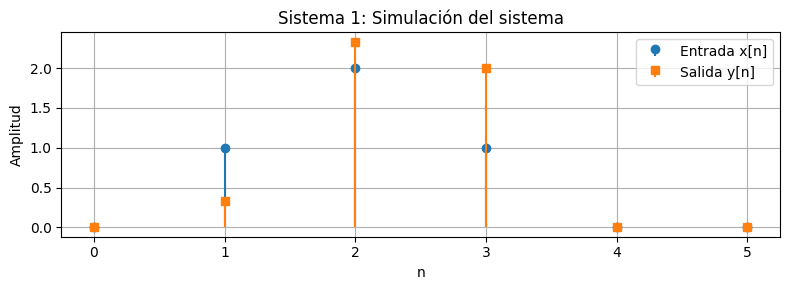

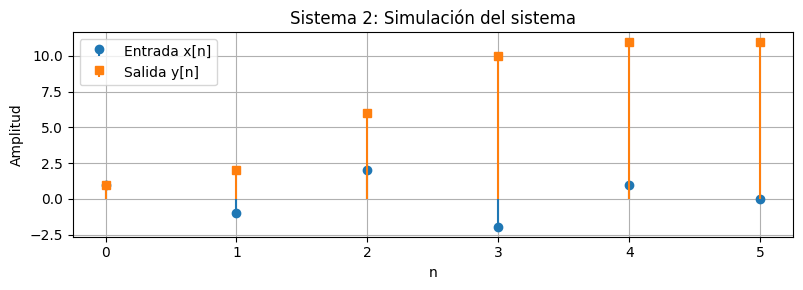

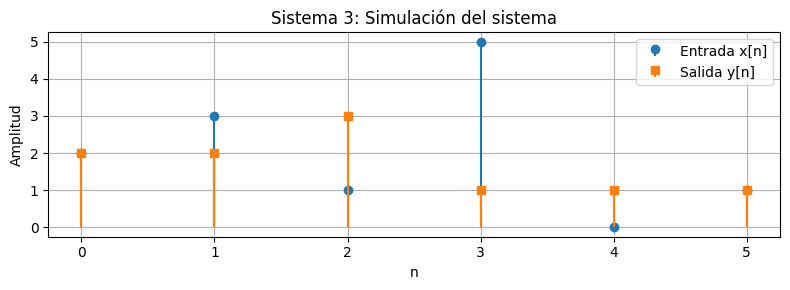

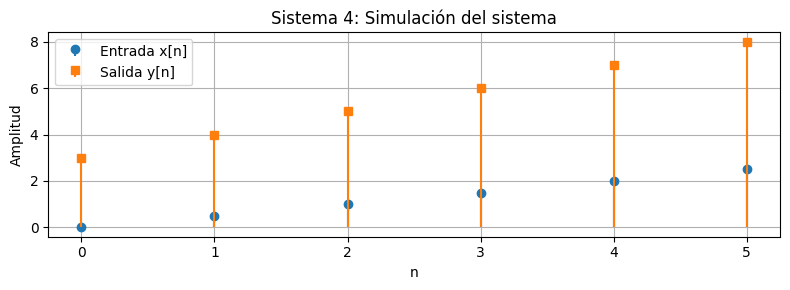

In [11]:
# -------------------------
# Simulación visual de los sistemas
# -------------------------

entradas = {
    'Sistema 1': np.array([0, 1, 2, 1, 0, 0], dtype=float),
    'Sistema 2': np.array([1, -1, 2, -2, 1, 0], dtype=float),
    'Sistema 3': np.array([2, 3, 1, 5, 0, 1], dtype=float),
    'Sistema 4': np.array([0, 0.5, 1, 1.5, 2, 2.5], dtype=float)
}

sistemas = {
    'Sistema 1': sistema1,
    'Sistema 2': sistema2,
    'Sistema 3': sistema3,
    'Sistema 4': sistema4
}

for nombre, x in entradas.items():
    y = sistemas[nombre](x)
    plt.figure(figsize=(8, 3))
    plt.stem(x, basefmt=" ", linefmt='C0-', markerfmt='C0o', label='Entrada x[n]')
    plt.stem(y, basefmt=" ", linefmt='C1-', markerfmt='C1s', label='Salida y[n]')
    plt.title(f"{nombre}: Simulación del sistema")
    plt.xlabel("n")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


---

###  Hallar la salida $y[n]$ de un SLIT ante la entrada  
$x[n] = \{-15, 5, -3^1, 0, 5, 7, -1\}$,  
con respuesta al impulso  
$h[n] = \{1, 2, 0, 1, -2, 4\}$,  
donde $n \in \{0, \pm 1, \pm 2, \ldots\}$ y  
$x[n] = 0$ para $x[n'] \notin x[n]$.

> Nota: Utilizar método gráfico para encontrar la salida y comprobar con simulación en Python.  
Ver cuaderno **Convolución discreta**. Repetir el proceso para el sistema con respuesta al escalón  
$\{ -1, 6, -1, 3^1, 1, 0, -2, 5 \}$  
(ver cuaderno **Respuesta Escalón**).
